In [3]:
import pandas as pd

## This week’s topic: Egg prices

Here’s a story from the San Francisco Standard (a publication I know nothing else about, but whose article seems to explain things pretty well): https://sfstandard.com/arts-culture/food/san-francisco-donut-shop-reveals-insane-new-price-of-eggs/

This week, we’re going to look at egg data from the US Department of Agriculture (USDA). Here are the questions I’d like you to answer:

1. Given URLs for each of the last five years of egg prices, create a single data frame.
1. What was the average low price for eggs in each of the years of data?
1. In what year was the percentage increase the greatest?
1. Now get the average low price for eggs in each month and year of data.

Have egg prices gone down in the last few months?

I’ll warn you right now that getting the data into a single data frame will be a bit tricky. That’s because you can only download up to two years of data at a time. The URL to download the data is:

```python
f'https://marketnews.usda.gov/mnp/py-report?&repDate=01%2F01%2F{year}&regionsDesc=&endDate=12%2F31%2F{year}&repMonth=1&run=Run&_producttypefrom=1&endYear=2023&producttypefrom=&repYear=2020&categoryDesc=Egg&frequency=Daily&datatype=None+Selected&previouscls=Breaking+Stock&_producttype=1&report=NW_PY041&category=Egg&subcategory=Breaking+Stock&endMonth=1&commodityDesc=Breaking+Stock&runReport=true&format=excel' 
```

Notice that I’ve given you the URL as a Python f-string, with the expectation that the variable “year” will contain the year for which you want data.

Also: Even though the end of the URL says “format=excel”, and I got that URL from clicking on the “download Excel file” icon on the USDA site, it’s … not Excel. It’s actually a bunch of HTML tables. Weird? Yes! But welcome to the wild and wacky world of data, and working with it.

### 1. Given URLs for each of the last five years of egg prices, create a single data frame.

In [4]:
def download_data(year) -> pd.DataFrame:
    url = f"https://marketnews.usda.gov/mnp/py-report?&repDate=01%2F01%2F{year}&regionsDesc=&endDate=12%2F31%2F{year}&repMonth=1&run=Run&_producttypefrom=1&endYear=2023&producttypefrom=&repYear=2020&categoryDesc=Egg&frequency=Daily&datatype=None+Selected&previouscls=Breaking+Stock&_producttype=1&report=NW_PY041&category=Egg&subcategory=Breaking+Stock&endMonth=1&commodityDesc=Breaking+Stock&runReport=true&format=excel"
    return pd.read_html(url)[0]

In [5]:
def get_data(years: list) -> pd.DataFrame:
    dfs = [download_data(year) for year in years]
    return pd.concat(dfs)

In [8]:
years = [2018, 2019, 2020, 2021, 2022, 2023]
df = get_data(years)

In [9]:
df.head()

,Date,Region,Egg Class,Market Name,Delivery Name,Price Unit,Low Price,High Price,Mostly Low,Mostly High
0,01/02/2018,CENTRAL STATES,BREAKING STOCK,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,77.0,78,NaN,NaN
1,01/02/2018,CENTRAL STATES,CHECKS,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,60.0,68,63.0,68.0
2,01/03/2018,CENTRAL STATES,CHECKS,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,58.0,66,61.0,66.0
3,01/03/2018,CENTRAL STATES,BREAKING STOCK,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,75.0,76,NaN,NaN
4,01/04/2018,CENTRAL STATES,BREAKING STOCK,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,72.0,73,NaN,NaN


In [10]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [11]:
df.head()

,Region,Egg Class,Market Name,Delivery Name,Price Unit,Low Price,High Price,Mostly Low,Mostly High
Date,,,,,,,,,
2018-01-02,CENTRAL STATES,BREAKING STOCK,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,77.0,78,NaN,NaN
2018-01-02,CENTRAL STATES,CHECKS,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,60.0,68,63.0,68.0
2018-01-03,CENTRAL STATES,CHECKS,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,58.0,66,61.0,66.0
2018-01-03,CENTRAL STATES,BREAKING STOCK,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,75.0,76,NaN,NaN
2018-01-04,CENTRAL STATES,BREAKING STOCK,CENTRAL STATES,DELIVERED TO BREAKERS,CENTS PER DOZEN,72.0,73,NaN,NaN


### 2. What was the average low price for eggs in each of the years of data?

In [12]:
df.groupby(df.index.year).mean(numeric_only=True)

,Low Price,High Price,Mostly Low,Mostly High
Date,,,,
2018,59.083333,65.644578,55.325581,60.049834
2019,27.268000,32.858000,23.220896,27.244776
2020,32.950199,38.507968,30.973134,35.364179
2021,49.072000,54.326000,45.901587,49.949206
2022,188.148000,199.242000,183.421642,186.123134
2023,117.124498,130.795181,118.542857,121.142857


<Axes: xlabel='Date'>

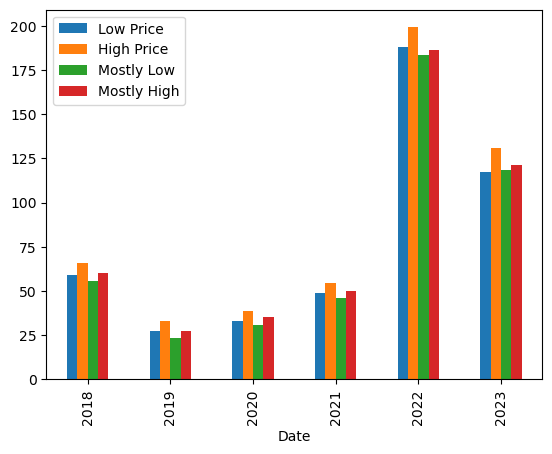

In [13]:
df.groupby(df.index.year).mean(numeric_only=True).plot(kind="bar")

### 3. In what year was the increase the greatest?

In [16]:
df.groupby(df.index.year).mean(numeric_only=True).pct_change() * 100

,Low Price,High Price,Mostly Low,Mostly High
Date,,,,
2018,NaN,NaN,NaN,NaN
2019,-53.848237,-49.945600,-58.028646,-54.629723
2020,20.838342,17.195107,33.384754,29.801687
2021,48.927779,41.077296,48.198070,41.242375
2022,283.412129,266.752568,299.597601,272.624808
2023,-37.748741,-34.353610,-35.371390,-34.912520


### 4. Now get the average low price for eggs in each month and year of data.

In [17]:
df.groupby([df.index.year, df.index.month]).mean(numeric_only=True)

Low Price  High Price  Mostly Low  Mostly High
Date Date                                                 
2018 1      54.190476   61.642857   51.090909    55.954545
     2      68.000000   74.078947   63.315789    68.315789
     3     104.068182  110.500000   99.000000   104.083333
     4      78.785714   86.880952   75.586207    80.034483
     5      56.522727   61.863636   50.136364    55.136364
...               ...         ...         ...          ...
2023 8      78.500000   86.652174   74.217391    76.217391
     9      78.175000   90.050000   75.800000    77.800000
     10     73.642857   84.000000   72.227273    74.545455
     11    100.400000  108.675000   96.350000    98.350000
     12    105.000000  111.500000  100.000000   102.000000

[72 rows x 4 columns]

### 5. Have egg prices gone down in the last few months?

<Axes: xlabel='Date'>

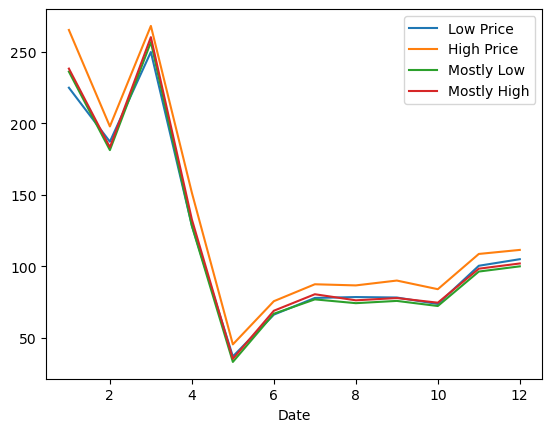

In [20]:
df.loc["2023"].groupby(df.loc["2023"].index.month).mean(numeric_only=True).plot(kind="line")